## Type I Error

In [ ]:
import scipy.spatial

tree = scipy.spatial.KDTree(g.theta_tiles)

In [ ]:
t0 = worst_tile[0]
ng = 300
t1 = np.linspace(-1, 1, ng)
t2 = np.linspace(-1, 1, ng)
TG = np.stack(
    (
        np.full((ng, ng), t0),
        *np.meshgrid(t1, t2, indexing="ij"),
    ),
    axis=-1,
)
TGF = TG.reshape(-1, 3)
nearby = tree.query(TGF, k=5)

In [ ]:
idxs = np.unique(nearby[1])
typeI_sum = np.zeros(g.n_tiles)
typeI_sum[idxs] = batched_many_rej(
    sim_sizes[idxs],
    (
        np.full((idxs.shape[0], 1), overall_cv),
        g.theta_tiles[idxs],
        g.null_truth[idxs],
    ),
    (unifs,),
    unifs_order,
)[:, 0]
typeI_err = typeI_sum / sim_sizes

running for size 2000 with 5161 tiles took 4.826196908950806
running for size 16000 with 2366 tiles took 15.737522602081299
running for size 32000 with 87 tiles took 1.1202466487884521
running for size 64000 with 26 tiles took 1.1076807975769043
running for size 128000 with 13 tiles took 1.11198091506958
running for size 256000 with 9 tiles took 1.1044256687164307


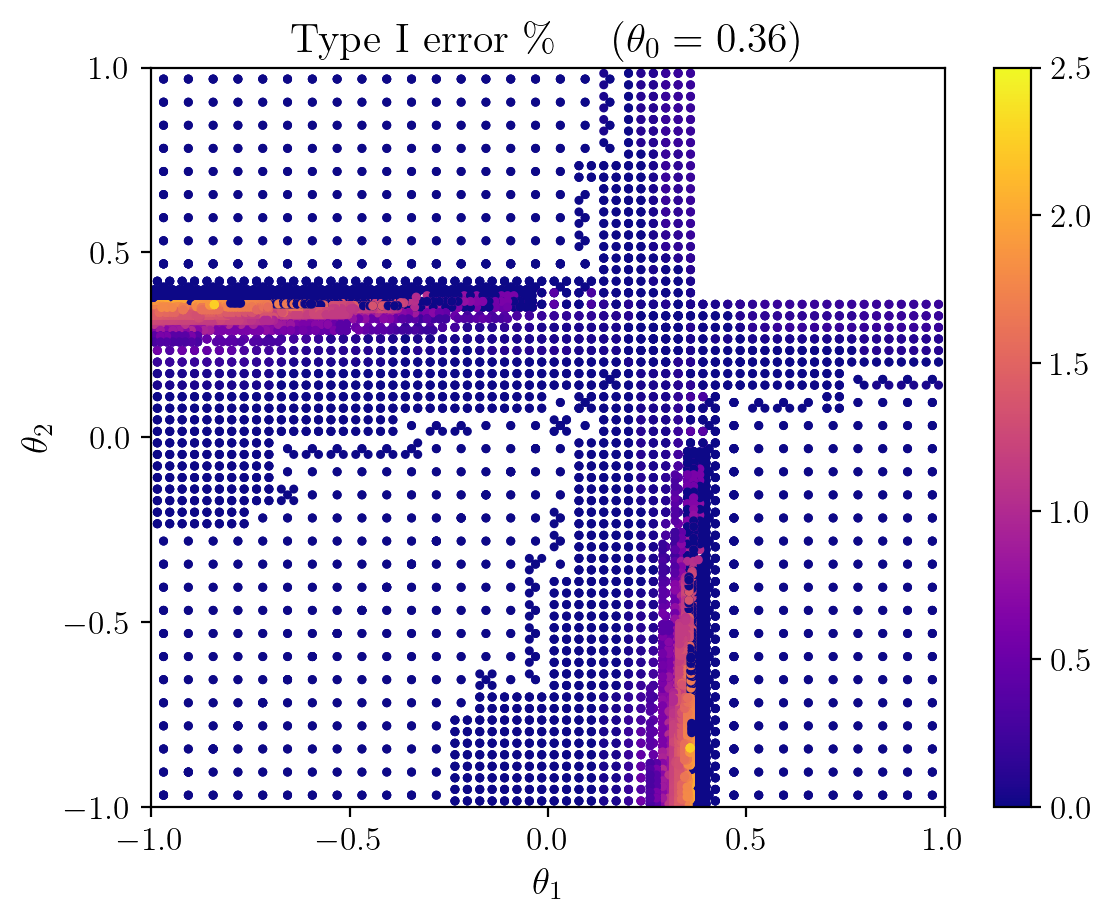

In [ ]:
x = g.theta_tiles[idxs, 1]
y = g.theta_tiles[idxs, 2]
z = 100 * typeI_err[idxs]
alt_hypo = (x > t0) & (y > t0)
z[alt_hypo] = np.nan
plt.title(f"Type I error \% $\quad(\\theta_0 = {t0:.2f})$")
plt.scatter(x, y, c=z, s=5, vmin=0, vmax=2.5)
plt.scatter(y, x, c=z, s=5, vmin=0, vmax=2.5)
plt.colorbar()
plt.xlabel("$\\theta_1$")
plt.ylabel("$\\theta_2$")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xticks([-1, -0.5, -0, 0.5, 1])
plt.yticks([-1, -0.5, -0, 0.5, 1])
plt.savefig("lei_pts.png", dpi=300, bbox_inches="tight")
plt.show()

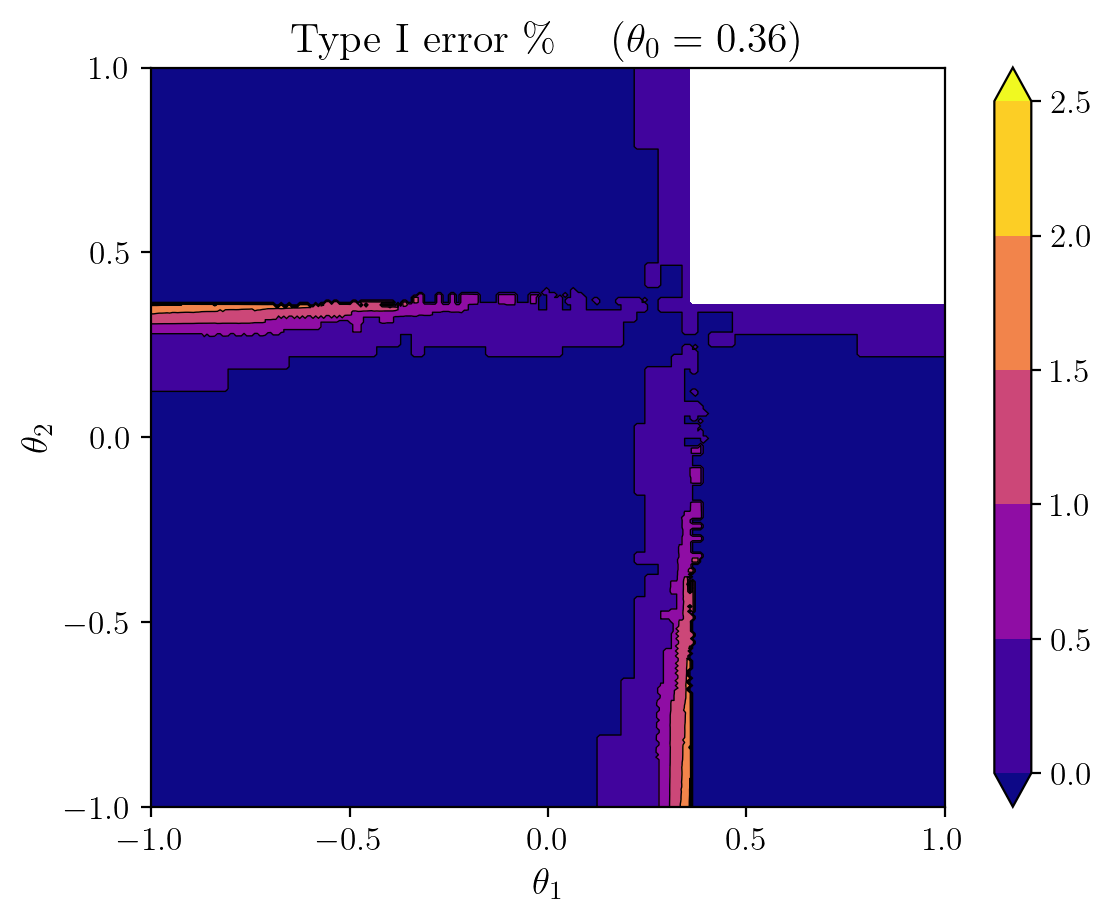

In [ ]:
x = TG[..., 1]
y = TG[..., 2]
flip = TG[..., 2] > TG[..., 1]
z = 100 * typeI_err[nearby[1][:, 0]].reshape(ng, ng)
z[flip] = z.T[flip]
alt_hypo = (TG[..., 1] > t0) & (TG[..., 2] > t0)
z[alt_hypo] = np.nan
levels = np.linspace(0, 2.5, 6)
plt.title(f"Type I error \% $\quad(\\theta_0 = {t0:.2f})$")
cntf = plt.contourf(x, y, z, levels=levels, extend="both")
plt.contour(
    x, y, z, levels=levels, colors="k", linestyles="-", linewidths=0.5, extend="both"
)
cbar = plt.colorbar(cntf)  # , ticks=[0, 1, 2, 3, 4])
# cbar.ax.set_yticklabels(["1", "10", "$10^2$", "$10^3$", "$10^4$"])
plt.xlabel("$\\theta_1$")
plt.ylabel("$\\theta_2$")
plt.xticks([-1, -0.5, -0, 0.5, 1])
plt.yticks([-1, -0.5, -0, 0.5, 1])
plt.savefig("leit1e.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
x = TG[..., 1]
y = TG[..., 2]
flip = TG[..., 2] > TG[..., 1]
z = 100 * typeI_err[nearby[1][:, 0]].reshape(ng, ng)
z[flip] = z.T[flip]
alt_hypo = (TG[..., 1] > t0) & (TG[..., 2] > t0)
z[alt_hypo] = np.nan

In [ ]:
bound_components = np.array(
    [
        z[~alt_hypo] / 100,
        z[~alt_hypo] / 100,
        z[~alt_hypo] / 100,
        z[~alt_hypo] / 100,
        z[~alt_hypo] / 100,
        z[~alt_hypo] / 100,
    ]
).reshape((6, -1))

In [ ]:
bound_components.shape

(6, 80784)

In [ ]:
bound_components.shape

(6, 80784)

In [ ]:
np.savetxt(f"P.csv", TGF[~alt_hypo.flatten()][:, 1:].T, fmt="%s", delimiter=",")
np.savetxt(f"B.csv", bound_components.T, fmt="%s", delimiter=",")

## Grid density

In [ ]:
g.theta_tiles[np.argmin(bootstrap_cvs[:, 0])]

array([ 0.36035156,  0.35839844, -0.84082031])

In [ ]:
t2 = -0.84
ng = 50
t0 = np.linspace(-1, 1, ng)
t1 = np.linspace(-1, 1, ng)
TG = np.stack((*np.meshgrid(t0, t1, indexing="ij"), np.full((ng, ng), t2)), axis=-1)
TGF = TG.reshape(-1, 3)

In [ ]:
t0 = -0.01
ng = 71
t1 = np.linspace(-1, 1, ng)
t2 = np.linspace(-1, 1, ng)
TG = np.stack(
    (
        np.full((ng, ng), t0),
        *np.meshgrid(t1, t2, indexing="ij"),
    ),
    axis=-1,
)
TGF = TG.reshape(-1, 3)

In [ ]:
nearby = tree.query_ball_point(TGF, 0.05)
nearby_count = [len(n) for n in nearby]

/tmp/ipykernel_31819/3420229717.py:5: RuntimeWarning: divide by zero encountered in log10
  z = np.log10(z)


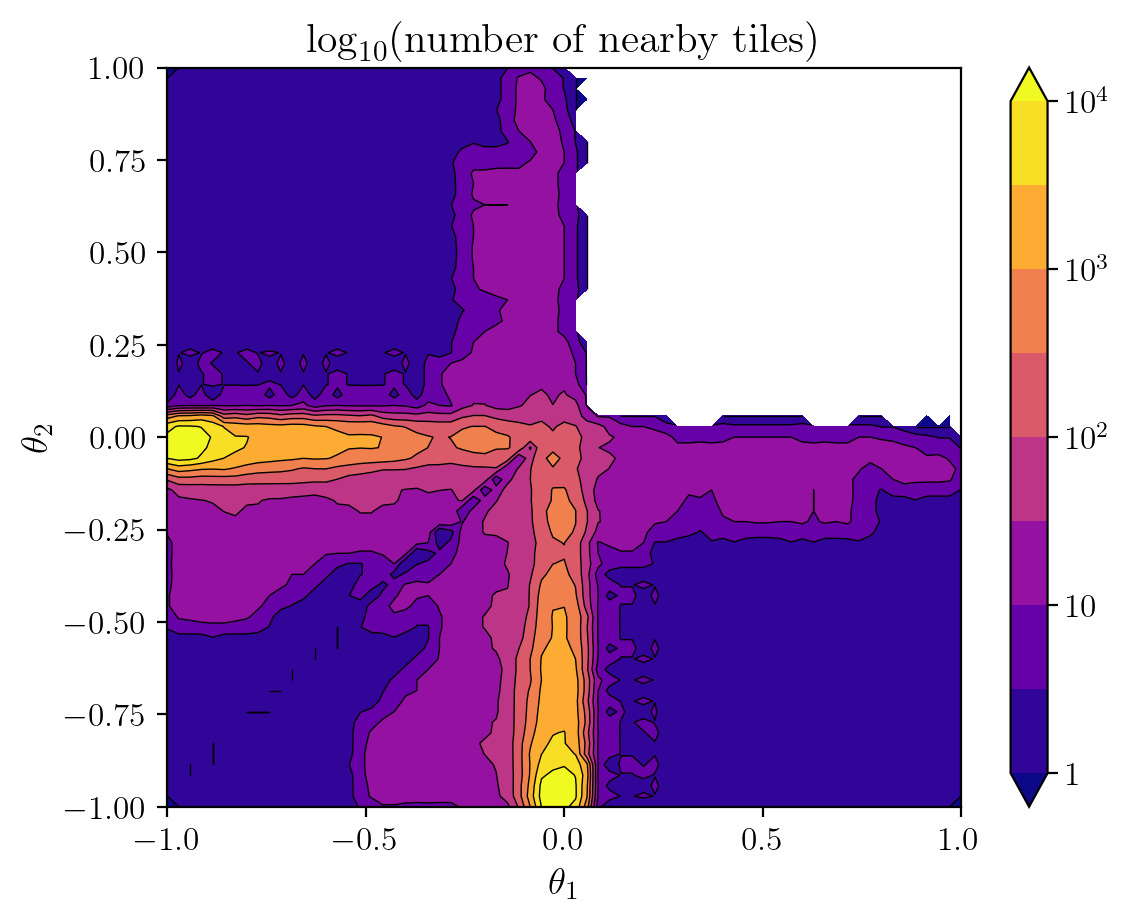

In [ ]:
x = TG[..., 1]
y = TG[..., 2]
z = np.array(nearby_count).reshape(ng, ng)
z[z == 0] = z.T[z == 0]
z = np.log10(z)
levels = np.linspace(0, 4, 9)
plt.title("$\log_{10}$(number of nearby tiles)")
cntf = plt.contourf(x, y, z, levels=levels, extend="both")
plt.contour(
    x,
    y,
    z,
    levels=levels,
    colors="k",
    linestyles="-",
    linewidths=0.5,
    extend="both",
)
cbar = plt.colorbar(cntf, ticks=[0, 1, 2, 3, 4])
cbar.ax.set_yticklabels(["1", "10", "$10^2$", "$10^3$", "$10^4$"])
plt.xlabel("$\\theta_1$")
plt.ylabel("$\\theta_2$")
plt.show()